# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
drive_path = '/content/drive/MyDrive/Final Project/'
project_folder = 'Final Project/'
os.chdir(drive_path)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
unrate = pd.read_csv('/content/drive/MyDrive/Final Project/UNRATE.csv')
overdose = pd.read_csv('/content/drive/MyDrive/Final Project/drug-overdose-death-rates.csv')

unrate.head(), overdose.head()

(  observation_date  UNRATE
 0       1999-09-01     4.2
 1       1999-10-01     4.1
 2       1999-11-01     4.1
 3       1999-12-01     4.0
 4       2000-01-01     4.0,
           Entity Code  Year  Any opioid death rates (CDC WONDER)  \
 0  United States  USA  1999                                  2.9   
 1  United States  USA  2000                                  3.0   
 2  United States  USA  2001                                  3.3   
 3  United States  USA  2002                                  4.1   
 4  United States  USA  2003                                  4.5   
 
    Cocaine overdose death rates (CDC WONDER)  \
 0                                        1.4   
 1                                        1.3   
 2                                        1.3   
 3                                        1.6   
 4                                        1.8   
 
    Heroin overdose death rates (CDC WONDER)  \
 0                                       0.7   
 1                     

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
unrate_raw = df.copy()
overdose_raw = pd.read_csv('/content/drive/MyDrive/Final Project/drug-overdose-death-rates.csv')

unrate_raw['observation_date'] = pd.to_datetime(unrate_raw['observation_date'])
unrate_raw['Year'] = unrate_raw['observation_date'].dt.year
unrate_yearly = unrate_raw.groupby('Year')['UNRATE'].mean().reset_index()
unrate_yearly = unrate_yearly.rename(columns={'UNRATE': 'Unemployment_Rate'})

overdose_filtered = overdose_raw[overdose_raw['Entity'] == 'United States'].copy()
overdose_processed = overdose_filtered[['Year', 'Any opioid death rates (CDC WONDER)']]
overdose_processed = overdose_processed.rename(columns={'Any opioid death rates (CDC WONDER)': 'Opioid_Deaths_per_100k'})

data = pd.merge(unrate_yearly, overdose_processed, on='Year', how='inner')

print(data.head(10))
print(data.tail(10))

   Year  Unemployment_Rate  Opioid_Deaths_per_100k
0  1999           4.100000                     2.9
1  2000           3.966667                     3.0
2  2001           4.741667                     3.3
3  2002           5.783333                     4.1
4  2003           5.991667                     4.5
5  2004           5.541667                     4.7
6  2005           5.083333                     5.1
7  2006           4.608333                     5.9
8  2007           4.616667                     6.1
9  2008           5.800000                     6.4
    Year  Unemployment_Rate  Opioid_Deaths_per_100k
12  2011           8.933333                     7.3
13  2012           8.075000                     7.4
14  2013           7.358333                     7.9
15  2014           6.158333                     9.0
16  2015           5.275000                    10.4
17  2016           4.875000                    13.3
18  2017           4.358333                    14.9
19  2018           3.89

In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

              Year  Unemployment_Rate  Opioid_Deaths_per_100k
count    22.000000          22.000000               22.000000
mean   2009.500000           5.921338                8.231818
std       6.493587           1.871735                4.856747
min    1999.000000           3.675000                2.900000
25%    2004.250000           4.610417                4.800000
50%    2009.500000           5.408333                6.700000
75%    2014.750000           7.058333               10.050000
max    2020.000000           9.608333               21.400000

Correlation:
                        Unemployment_Rate  Opioid_Deaths_per_100k
Unemployment_Rate                1.000000                0.045041
Opioid_Deaths_per_100k           0.045041                1.000000


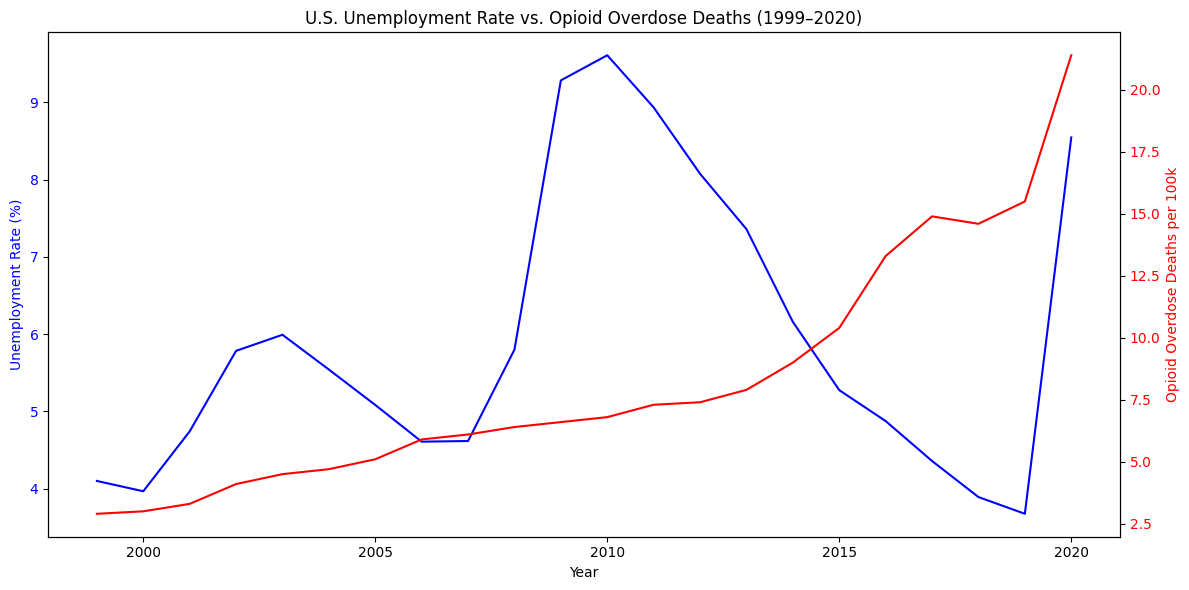

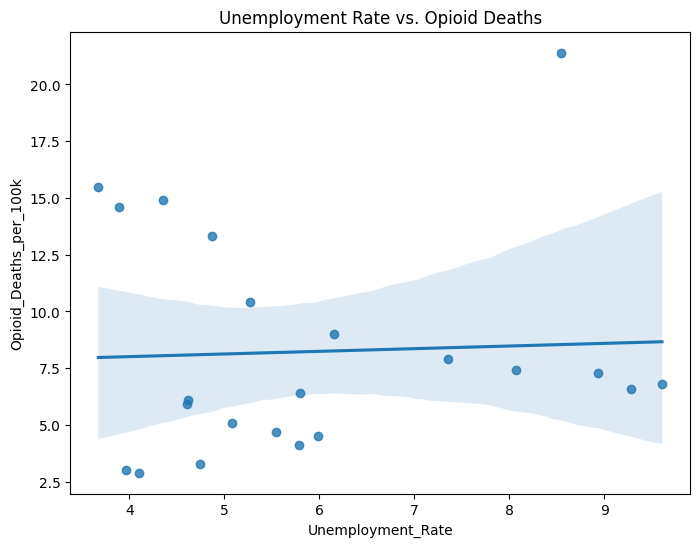

In [ ]:
print(data.describe())

print("\nCorrelation:")
print(data[['Unemployment_Rate', 'Opioid_Deaths_per_100k']].corr())

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(data['Year'], data['Unemployment_Rate'], color='blue', label='Unemployment Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Opioid_Deaths_per_100k'], color='red', label='Opioid Deaths per 100k')
ax2.set_ylabel('Opioid Overdose Deaths per 100k', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('U.S. Unemployment Rate vs. Opioid Overdose Deaths (1999–2020)')
fig.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x='Unemployment_Rate', y='Opioid_Deaths_per_100k', data=data)
plt.title('Unemployment Rate vs. Opioid Deaths')
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# Research hypothesis: Higher unemployment >> High opioid overdose deaths
# Null hypothesis: There is no relationship between unemployment rates and opioid overdose deaths in the United States between 1999-2020
# Simple linear regression
model = smf.ols('Opioid_Deaths_per_100k ~ Unemployment_Rate', data=data).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Opioid_Deaths_per_100k   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.048
Method:                     Least Squares   F-statistic:                   0.04066
Date:                    Mon, 08 Dec 2025   Prob (F-statistic):              0.842
Time:                            00:20:31   Log-Likelihood:                -65.451
No. Observations:                      22   AIC:                             134.9
Df Residuals:                          20   BIC:                             137.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
# Statistical Results

#Linear Regression Model: Opioid_Deaths_per_100k = β₀ + β₁ × Unemployment_Rate + ε

#Null hypothesis (H₀):** β₁ = 0. There is no relationship between unemployment and opioid overdoses.

#Results:
#- Coefficient on unemployment: **0.117** (p = **0.842**)
#- Fail to reject the null hypothesis at conventional significance levels
#- R-squared: 0.002 (unemployment explains <0.2% of variation in opioid deaths)

# Interpretation

#We find no statistically significant relationship between the unemployment rate and opioid overdose mortality rates between 1999 and 2020. This suggests that the opioid epidemic was driven primarily by non-economic factors.

#The lack of relationship is particularly striking given the major unemployment spikes during the 2008-09 Great Recession and the 2020 COVID recession, which did not correspond to immediate increases in opioid mortality.

/tmp/ipython-input-2211788377.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


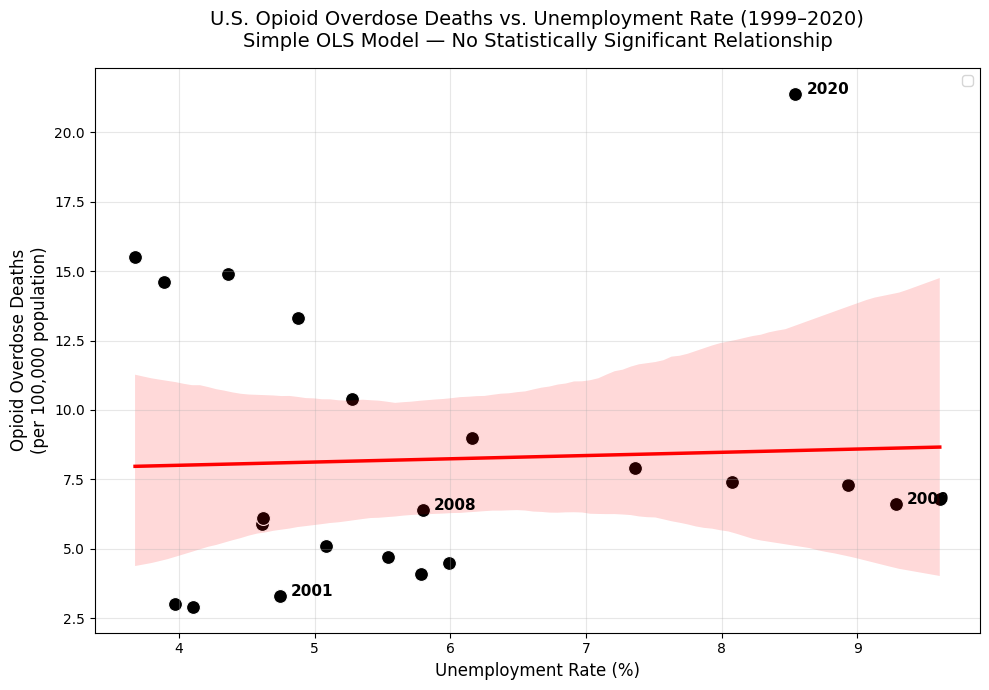

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=data,
                x='Unemployment_Rate',
                y='Opioid_Deaths_per_100k',
                s=100, color='black')

for year in [2001, 2008, 2009, 2020]:
    row = data[data['Year'] == year]
    plt.text(row['Unemployment_Rate'].iloc[0] + 0.08,
             row['Opioid_Deaths_per_100k'].iloc[0],
             str(year), fontsize=11, weight='bold')

sns.regplot(data=data,
            x='Unemployment_Rate',
            y='Opioid_Deaths_per_100k',
            scatter=False,
            color='red',
            line_kws={'linewidth': 2.5, 'label': 'Fitted OLS line (slope = 0.12, p = 0.842)'})

plt.title('U.S. Opioid Overdose Deaths vs. Unemployment Rate (1999–2020)\n'
          'Simple OLS Model — No Statistically Significant Relationship',
          fontsize=14, pad=15)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Opioid Overdose Deaths\n(per 100,000 population)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()